In [16]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
from dotenv import load_dotenv
%matplotlib inline

In [17]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [3]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SECRET = os.getenv('PLAID_SECRET')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to plaid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

In [19]:
type(PLAID_PUBLIC_KEY)

str

### 1. Create a client to connect to plaid

In [20]:
# YOUR CODE HERE
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET, public_key=PLAID_PUBLIC_KEY, environment='sandbox')
print(client)

### 2. Generate a public token

In [22]:
# YOUR CODE HERE
INSTITUTION_ID = "ins_109508"

create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions', 'income', 'assets'])

### 3. Exchange the public token for an access token

In [23]:
# YOUR CODE HERE
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])
access_token = exchange_response['access_token']
print(access_token)

access-sandbox-c618f84d-60aa-411a-b110-0296c7d4e93d


### 4. Fetch Accounts

In [24]:
# YOUR CODE HERE
client.Accounts.get(access_token)

{'accounts': [{'account_id': '3eZdk47NmEH8ZEnoEQN4h4jl5XJX4KuqRgEX9',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'x365k1eJz8ImQq56qEXLI3d7w9n93jsnBMegx',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'dPR87vnrQzUvp6by6RkxIMRlL8G8MeHZayR97',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [119]:
# YOUR CODE HERE
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())
transaction_response = client.Transactions.get(access_token,start_date,end_date)
transactions_list = json.dumps(transaction_response['transactions'],indent=4, sort_keys=True)
print(transactions_list)

[
    {
        "account_id": "aaR9NvWljqH5aNonN7KzI5qAzede5Ei736Dnz",
        "account_owner": null,
        "amount": 500,
        "authorized_date": null,
        "category": [
            "Food and Drink",
            "Restaurants"
        ],
        "category_id": "13005000",
        "date": "2020-04-25",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "name": "Tectra Inc",
        "payment_channel": "in store",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "reference_number": null
        },
        "pending": false,
    

### 2. Print the categories for each transaction

In [65]:
# YOUR CODE HERE
transactions = transaction_response['transactions']
all_categories = []
for tran in transactions:
    category = tran['category'][0]
    all_categories.append(category)
    print(category)

Food and Drink
Payment
Food and Drink
Shops
Payment
Travel
Transfer
Transfer
Recreation
Travel
Food and Drink
Food and Drink
Food and Drink
Transfer
Travel
Travel
Food and Drink
Payment
Food and Drink
Shops
Payment
Travel
Transfer
Transfer
Recreation
Travel
Food and Drink
Food and Drink
Food and Drink
Transfer
Travel
Travel
Food and Drink
Payment
Food and Drink
Shops
Payment
Travel
Transfer
Transfer
Recreation
Travel
Food and Drink
Food and Drink
Food and Drink
Transfer
Travel
Travel


### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [79]:
transactions_df = pd.DataFrame(columns=["Date", "Name", "Amount", "Category"])
dates = []
names = []
amounts = []
catt = []
for transaction in transactions:
    dates.append(transaction["date"])
    names.append(transaction["name"])
    amounts.append(float(transaction["amount"]))
    catt.append(transaction["category"][0])
transactions_df["Date"] = dates
transactions_df["Name"] = names
transactions_df["Amount"] = amounts
transactions_df["Category"] = catt
transactions_df.head()

,Date,Name,Amount,Category
0,2020-04-25,Tectra Inc,500.0,Food and Drink
1,2020-04-24,AUTOMATIC PAYMENT - THANK,2078.5,Payment
2,2020-04-24,KFC,500.0,Food and Drink
3,2020-04-24,Madison Bicycle Shop,500.0,Shops
4,2020-04-15,CREDIT CARD 3333 PAYMENT *//,25.0,Payment


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [81]:
# YOUR CODE HERE

transactions_df.set_index(pd.DatetimeIndex(transactions_df['Date']), inplace =True)
transactions_df.drop(columns = ['Date'], inplace =True)
transactions_df.head()

,Name,Amount,Category
Date,,,
2020-04-25,Tectra Inc,500.0,Food and Drink
2020-04-24,AUTOMATIC PAYMENT - THANK,2078.5,Payment
2020-04-24,KFC,500.0,Food and Drink
2020-04-24,Madison Bicycle Shop,500.0,Shops
2020-04-15,CREDIT CARD 3333 PAYMENT *//,25.0,Payment


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [84]:
# YOUR CODE HERE
client.Accounts.get(access_token)
resp = client.Income.get(access_token)
last_year_gross_income = resp['income']['last_year_income_before_tax']
monthly_income = resp['income']['income_streams'][0]['monthly_income']
projected_yearly_income = monthly_income * 12

print(f"1. Previous Year's Gross Income: ${last_year_gross_income:,}")
print(f"2. Current Monthly Income: ${monthly_income}")
print(f"3. Projected Yearly Income: ${projected_yearly_income:,}")


1. Previous Year's Gross Income: $7,285
2. Current Monthly Income: $500
3. Projected Yearly Income: $6,000


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calculate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

In [93]:
# YOUR CODE HERE
expenses_by_category = transactions_df.groupby('Category'). sum()
#print(expenses_by_category)
expenses_by_category

,Amount
Category,
Food and Drink,3317.19
Payment,6310.50
Recreation,235.50
Shops,1500.00
Transfer,20537.34
Travel,35.19


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002BFF8D83B88>],
      dtype=object)

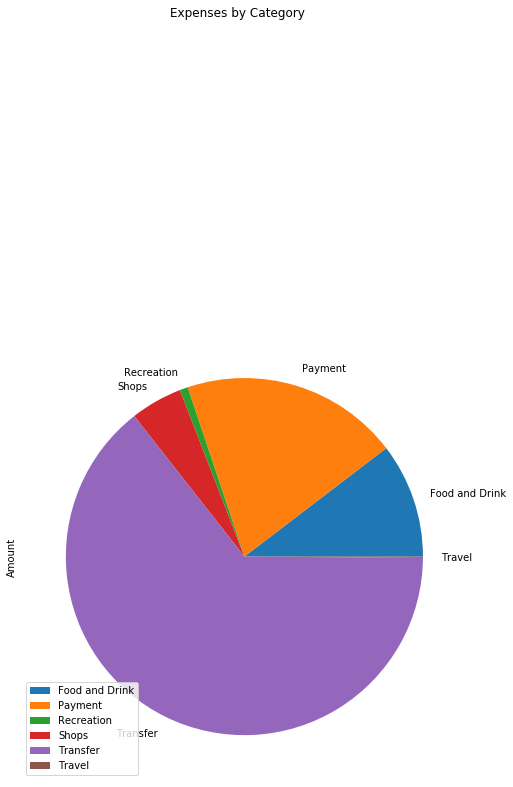

In [92]:
expenses_by_category. plot (kind = "pie", subplots  = True, title = "Expenses by Category", figsize = (8, 16))

### Calculate the expenses per month

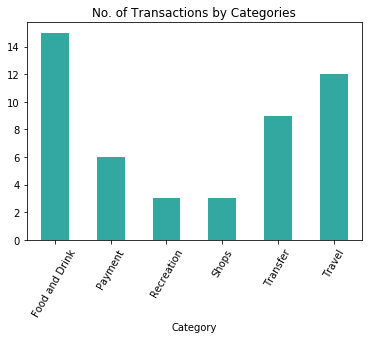

In [110]:
# YOUR CODE HERE
Monthly_Expenses = transactions_df.groupby ("Category"). count()

Monthly_Expenses['Amount']. plot (kind = 'bar', title = "No. of Transactions by Categories", rot = 60, color = '#32a8a0')

In [111]:
transactions_per_month = transactions_df.groupby(transactions_df.index.month).sum()
transactions_per_month


,Amount
Date,
1,506.33
2,10145.24
3,11145.24
4,10138.91


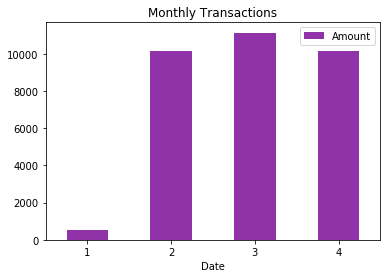

In [117]:
transactions_per_month.plot(kind = 'bar', title = "Monthly Transactions", rot = 360, color = "#9032a8")